In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd


In [2]:
cityData = pd.read_csv("Resources/city_data.csv")
rideData = pd.read_csv("Resources/ride_data.csv")


In [3]:
cityData.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
rideData.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
cityData.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
cityData.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
rideData.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [8]:
rideData.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
cityData.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
cityData.sum()["driver_count"]

2973

In [11]:
for cityType in cityData["type"].unique():
    numT = sum(cityData["type"] == cityType)
    print(f"{cityType} = {numT}")

Urban = 66
Suburban = 36
Rural = 18


In [12]:
rideData.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
pyberData = pd.merge(rideData, cityData, how = "left", on = ["city","city"])

pyberData.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
urbanCities = pyberData[pyberData["type"] == "Urban"]
suburbanCities = pyberData[pyberData["type"] == "Suburban"]
ruralCities =  pyberData[pyberData["type"] == "Rural"]


In [15]:
urbanRides = urbanCities.groupby(["city"]).count()["ride_id"]
suburbanRides = suburbanCities.groupby(["city"]).count()["ride_id"]
ruralRides = ruralCities.groupby(["city"]).count()["ride_id"]


In [16]:
urbanAvgFare = urbanCities.groupby(["city"]).mean()["fare"]
suburbanAvgFare = suburbanCities.groupby(["city"]).mean()["fare"]
ruralAvgFare = ruralCities.groupby(["city"]).mean()["fare"]

In [17]:
urbanDrivers = urbanCities.groupby(["city"]).mean()["driver_count"]
suburbanDrivers = suburbanCities.groupby(["city"]).mean()["driver_count"]
ruralDrivers = ruralCities.groupby(["city"]).mean()["driver_count"]


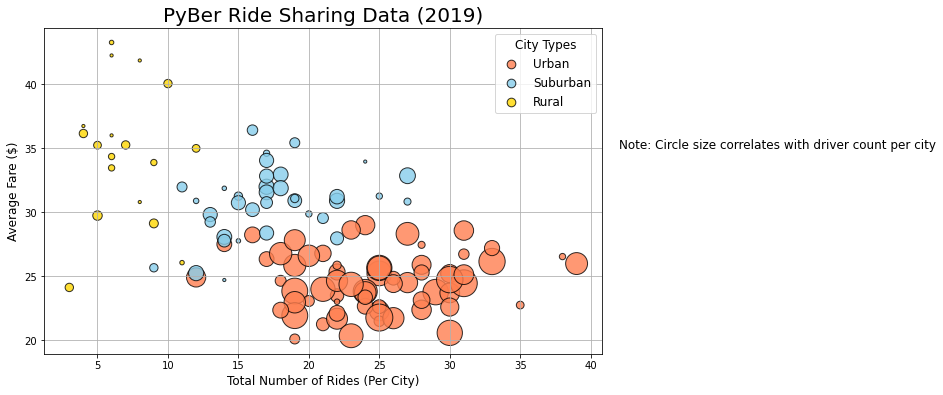

<Figure size 432x288 with 0 Axes>

In [18]:
plt.subplots(figsize = (10, 6))

plt.scatter(urbanRides,urbanAvgFare, s = 10*urbanDrivers, color = "coral", alpha = .8, edgecolor = "black", 
            linewidths = 1, label = "Urban")

plt.scatter(suburbanRides,suburbanAvgFare, s = 10*suburbanDrivers, color = "skyblue", alpha = .8, edgecolor = "black", 
            linewidths = 1, label = "Suburban")


plt.scatter(ruralRides,ruralAvgFare, s = 10*ruralDrivers, color = "gold", alpha = .8, edgecolor = "black", 
            linewidths = 1, label = "Rural")


plt.title("PyBer Ride Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize =12)
plt.grid()
lgnd = plt.legend(fontsize = 12, mode = "Expanded", scatterpoints = 1, loc = "best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35, "Note: Circle size correlates with driver count per city", fontsize = 12)

plt.show()

plt.savefig("analysis/Fig1.png")

In [22]:
urbanCities.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [23]:
suburbanCities.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [24]:
ruralCities.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [25]:
urbanRides.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [26]:
suburbanRides.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [27]:
ruralRides.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [29]:
round(urbanRides.mean(),2),round(suburbanRides.mean(),2),round(ruralRides.mean(),2)

(24.62, 17.36, 6.94)

In [31]:
urbanRides.median()

24.0

In [33]:
suburbanRides.mode()

0    17
dtype: int64

In [34]:
import numpy as np
import scipy.stats as sts

In [39]:
meanUrbanRides = np.mean(urbanRides)
print(f"The mean for the ride counts for urban trips is {meanUrbanRides:.2f}.")

medianUrbanRides = np.median(urbanRides)
print(f"The median for the ride counts for urban trips is {medianUrbanRides}.")

modeUrbanRides = sts.mode(ruralRides)
print(f"The mode for the ride counts for urban trips is {modeUrbanRides}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


In [61]:
urbanFares = urbanCities["fare"]
suburbanFares = suburbanCities["fare"]
ruralFares = ruralCities["fare"]
urbanFares.head(10)

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
5     9.52
6    43.25
7    35.98
8    35.09
9    42.81
Name: fare, dtype: float64

In [62]:
meanUrbanFares = np.mean(urbanFares)
modeUrbanFares = sts.mode(urbanFares)
medianUrbanFares = np.median(urbanFares)
line = "\n"

print(f"mean: ${meanUrbanFares:.2f} {line}medan: ${medianUrbanFares} {line}mode: ${modeUrbanFares}")

mean: $24.53 
medan: $24.64 
mode: $ModeResult(mode=array([22.86]), count=array([5]))


In [63]:
meanSuburbanFares = np.mean(suburbanFares)
modeSuburbanFares = sts.mode(suburbanFares)
medianSuburbanFares = np.median(suburbanFares)


print(f"mean: ${meanSuburbanFares:.2f} {line}medan: ${medianSuburbanFares} {line}mode: ${modeSuburbanFares}")

mean: $30.97 
medan: $30.75 
mode: $ModeResult(mode=array([17.99]), count=array([3]))


In [64]:
meanRuralFares = np.mean(ruralFares)
modeRuralFares = sts.mode(ruralFares)
medianRuralFares = np.median(ruralFares)
line = "\n"

print(f"mean: ${meanRuralFares:.2f} {line}medan: ${medianRuralFares} {line}mode: ${modeRuralFares}")

mean: $34.62 
medan: $37.05 
mode: $ModeResult(mode=array([37.05]), count=array([2]))


In [67]:
urbanDrivers = urbanCities["driver_count"]
suburbanDrivers = suburbanCities["driver_count"]
ruralDrivers = ruralCities["driver_count"]

In [69]:
round(suburbanDrivers.mean(),0)

14.0

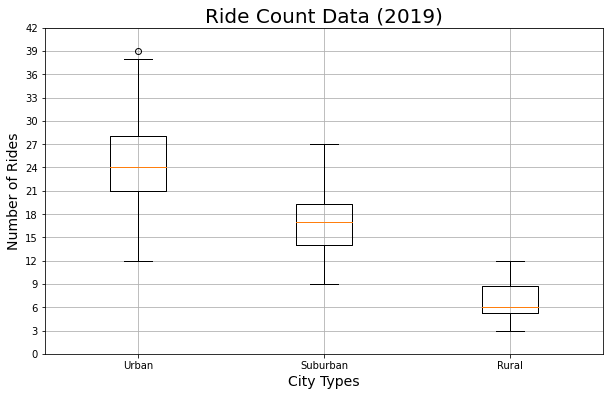

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [78]:
xlabels = ["Urban","Suburban","Rural"]
rideCountData = [urbanRides, suburbanRides, ruralRides,]

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(rideCountData, labels = xlabels)

ax.set_title("Ride Count Data (2019)", fontsize = 20)
ax.set_ylabel("Number of Rides", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0,45, step = 3.0))
ax.grid()
plt.show()

plt.savefig("analysis/Fig2.png")
plt.show

In [83]:
urbanOutlier = urbanRides[urbanRides == 39].index[0]

print(f"{urbanOutlier} has the highest rider count")

West Angela has the highest rider count


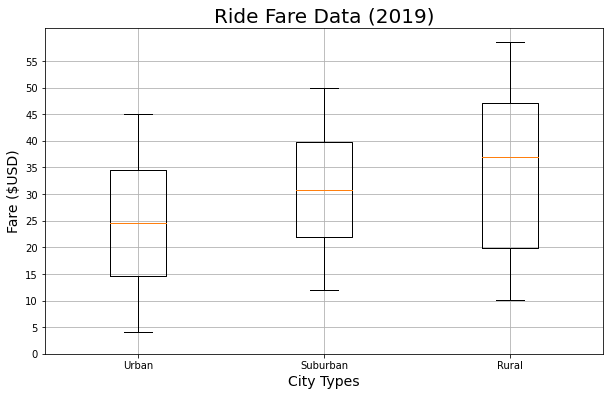

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [85]:
xlabels = ["Urban","Suburban","Rural"]
FareCountData = [urbanFares, suburbanFares, ruralFares,]

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(FareCountData, labels = xlabels)

ax.set_title("Ride Fare Data (2019)", fontsize = 20)
ax.set_ylabel("Fare ($USD)", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0,56, step = 5.0))
ax.grid()
plt.show()

plt.savefig("analysis/Fig2.png")
plt.show

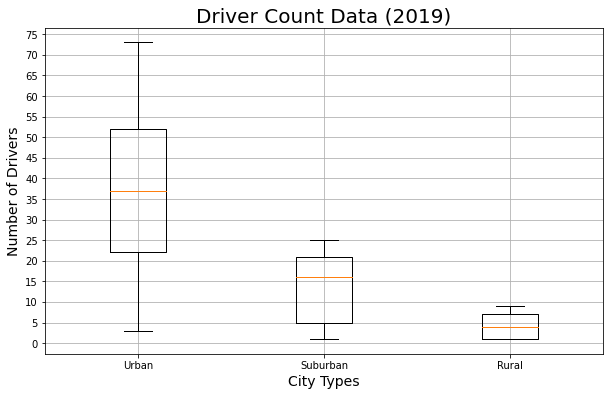

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

In [87]:
xlabels = ["Urban","Suburban","Rural"]
DriverCountData = [urbanDrivers, suburbanDrivers, ruralDrivers]

fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(DriverCountData, labels = xlabels)

ax.set_title("Driver Count Data (2019)", fontsize = 20)
ax.set_ylabel("Number of Drivers", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0,76, step = 5.0))
ax.grid()
plt.show()

plt.savefig("analysis/Fig2.png")
plt.show